In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
df=pd.read_csv('Airline_review.csv')
df

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23166,23166,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,Bangkok to Tokyo. I’ve flown many low cost ai...,NaN,Couple Leisure,Economy Class,Bangkok to Tokyo,June 2022,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no
23169,23169,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,Tokyo to Los Angeles,May 2022,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Airline Name,0
Overall_Rating,0
Review_Title,0
Review Date,0
Verified,0
Review,0
Aircraft,16042
Type Of Traveller,3738
Seat Type,1096


In [ ]:
df.columns

Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')

In [ ]:
verified_counts = df['Verified'].value_counts()
print(verified_counts)

Verified
True     12322
False    10849
Name: count, dtype: int64


In [ ]:
df = df[df['Verified'] == True]
df

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
5,5,Adria Airways,1,"""Had very bad experience""",17th September 2019,True,Had very bad experience with rerouted and ca...,CR 900,Couple Leisure,Economy Class,Sarajevo to Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23164,23164,ZIPAIR,1,"""$300 savings was absolutely not worth it""",22nd July 2022,True,My issues started before we even flew. I rec...,NaN,Family Leisure,Economy Class,Los Angeles to Narita,July 2022,3.0,4.0,1.0,1.0,1.0,2.0,2.0,no
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no
23169,23169,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,Tokyo to Los Angeles,May 2022,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes


In [ ]:
# List of columns to keep
columns_to_keep = ['Airline Name', 'Overall_Rating', 'Review_Title', 'Review Date', 'Review', 'Recommended']

# Create a new DataFrame with only the specified columns
new_df = df[columns_to_keep]

# Display the new DataFrame
print(new_df)

        Airline Name Overall_Rating  \
0        AB Aviation              9   
1        AB Aviation              1   
2        AB Aviation              1   
4      Adria Airways              1   
5      Adria Airways              1   
...              ...            ...   
23164         ZIPAIR              1   
23167         ZIPAIR              1   
23168         ZIPAIR              3   
23169         ZIPAIR              6   
23170         ZIPAIR              1   

                                     Review_Title          Review Date  \
0                         "pretty decent airline"   11th November 2019   
1                            "Not a good airline"       25th June 2019   
2                  "flight was fortunately short"       25th June 2019   
4           "it ruined our last days of holidays"  24th September 2019   
5                       "Had very bad experience"  17th September 2019   
...                                           ...                  ...   
23164  "$300 

In [ ]:
new_df.isnull().sum()

,0
Airline Name,0
Overall_Rating,0
Review_Title,0
Review Date,0
Review,0
Recommended,0


In [ ]:
new_df.dtypes

,0
Airline Name,object
Overall_Rating,object
Review_Title,object
Review Date,object
Review,object
Recommended,object


In [ ]:
# Find duplicate rows based on all columns
duplicate_rows = new_df[new_df.duplicated()]

# Remove duplicate rows and keep the first occurrence
df_cleaned = new_df.drop_duplicates()

# Optionally, you can reset the index of the cleaned DataFrame
# df_cleaned = df_cleaned.reset_index(drop=True)

# Display the cleaned DataFrame
df_cleaned

df_cleaned.to_csv('new_data.csv', index=False)

In [ ]:
data=pd.read_csv('new_data.csv')

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment using VADER
def analyze_sentiment_vader(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to your DataFrame
data['Sentiment_VADER'] = data['Review'].apply(analyze_sentiment_vader)
data['Sentiment_VADER_Title'] = data['Review_Title'].apply(analyze_sentiment_vader)
data

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Recommended,Sentiment_VADER,Sentiment_VADER_Title
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,Moroni to Moheli. Turned out to be a pretty ...,yes,Positive,Positive
1,AB Aviation,1,"""Not a good airline""",25th June 2019,Moroni to Anjouan. It is a very small airline...,no,Negative,Negative
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,Anjouan to Dzaoudzi. A very small airline an...,no,Positive,Neutral
3,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,Do not book a flight with this airline! My fr...,no,Negative,Negative
4,Adria Airways,1,"""Had very bad experience""",17th September 2019,Had very bad experience with rerouted and ca...,no,Negative,Negative
...,...,...,...,...,...,...,...,...
12314,ZIPAIR,1,"""$300 savings was absolutely not worth it""",22nd July 2022,My issues started before we even flew. I rec...,no,Positive,Negative
12315,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,Avoid at all costs. I booked flights to go f...,no,Negative,Negative
12316,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,Flight was leaving at 23.15 and after an hou...,no,Negative,Negative
12317,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,Zipair is JAL’s budget airline. They don’t ha...,yes,Positive,Positive


In [ ]:
from textblob import TextBlob

# Define a function to perform sentiment analysis using TextBlob
def analyze_sentiment(review):
    analysis = TextBlob(str(review))
    # Sentiment polarity ranges from -1 (negative) to 1 (positive)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Review' column and create a new column 'Sentiment'
data['Sentiment_TextBlob'] = data['Review'].apply(analyze_sentiment)
data['Sentiment_TextBlob_Title'] = data['Review_Title'].apply(analyze_sentiment)
data

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Recommended,Sentiment_VADER,Sentiment_VADER_Title,Sentiment_TextBlob,Sentiment_TextBlob_Title
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,Moroni to Moheli. Turned out to be a pretty ...,yes,Positive,Positive,Positive,Positive
1,AB Aviation,1,"""Not a good airline""",25th June 2019,Moroni to Anjouan. It is a very small airline...,no,Negative,Negative,Negative,Negative
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,Anjouan to Dzaoudzi. A very small airline an...,no,Positive,Neutral,Positive,Neutral
3,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,Do not book a flight with this airline! My fr...,no,Negative,Negative,Positive,Neutral
4,Adria Airways,1,"""Had very bad experience""",17th September 2019,Had very bad experience with rerouted and ca...,no,Negative,Negative,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...
12314,ZIPAIR,1,"""$300 savings was absolutely not worth it""",22nd July 2022,My issues started before we even flew. I rec...,no,Positive,Negative,Positive,Negative
12315,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,Avoid at all costs. I booked flights to go f...,no,Negative,Negative,Positive,Neutral
12316,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,Flight was leaving at 23.15 and after an hou...,no,Negative,Negative,Positive,Neutral
12317,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,Zipair is JAL’s budget airline. They don’t ha...,yes,Positive,Positive,Positive,Positive


In [ ]:
# Define weights for ensembling (adjust as needed)
weights = {
    "TextBlob": 0.2,  # Adjust the weight for TextBlob
    "TextBlob_Title": 0.1,  # Adjust the weight for TextBlob_Title
    "VADER": 0.45,  # Adjust the weight for VADER
    "VADER_Title": 0.25,  # Adjust the weight for VADER_Title
}

# Define a function to ensemble sentiment scores
def ensemble_sentiment(row):
    textblob_score = row['Sentiment_TextBlob']
    textblob_title_score = row['Sentiment_TextBlob_Title']
    vader_score = row['Sentiment_VADER']
    vader_title_score = row['Sentiment_VADER_Title']

    # Map sentiment labels to numerical values
    sentiment_mapping = {"Positive": 1, "Negative": -1, "Neutral": 0}

    # Convert sentiment labels to numeric values
    textblob_score = sentiment_mapping.get(textblob_score, 0)
    textblob_title_score = sentiment_mapping.get(textblob_title_score, 0)
    vader_score = sentiment_mapping.get(vader_score, 0)
    vader_title_score = sentiment_mapping.get(vader_title_score, 0)

    # Calculate the combined sentiment score
    combined_score = (
        weights['TextBlob'] * textblob_score +
        weights['TextBlob_Title'] * textblob_title_score +
        weights['VADER'] * vader_score +
        weights['VADER_Title'] * vader_title_score
    )

    # Apply thresholding to classify sentiment labels
    if combined_score > 0:
        return "Positive"
    elif combined_score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the ensemble function to create an 'Ensemble_Sentiment' column
data['Ensemble_Sentiment'] = data.apply(ensemble_sentiment, axis=1)

# Print the DataFrame with the ensemble results
data[['Review', 'Sentiment_TextBlob', 'Sentiment_TextBlob_Title', 'Sentiment_VADER', 'Sentiment_VADER_Title', 'Ensemble_Sentiment']]

,Review,Sentiment_TextBlob,Sentiment_TextBlob_Title,Sentiment_VADER,Sentiment_VADER_Title,Ensemble_Sentiment
0,Moroni to Moheli. Turned out to be a pretty ...,Positive,Positive,Positive,Positive,Positive
1,Moroni to Anjouan. It is a very small airline...,Negative,Negative,Negative,Negative,Negative
2,Anjouan to Dzaoudzi. A very small airline an...,Positive,Neutral,Positive,Neutral,Positive
3,Do not book a flight with this airline! My fr...,Positive,Neutral,Negative,Negative,Negative
4,Had very bad experience with rerouted and ca...,Negative,Negative,Negative,Negative,Negative
...,...,...,...,...,...,...
12314,My issues started before we even flew. I rec...,Positive,Negative,Positive,Negative,Positive
12315,Avoid at all costs. I booked flights to go f...,Positive,Neutral,Negative,Negative,Negative
12316,Flight was leaving at 23.15 and after an hou...,Positive,Neutral,Negative,Negative,Negative
12317,Zipair is JAL’s budget airline. They don’t ha...,Positive,Positive,Positive,Positive,Positive


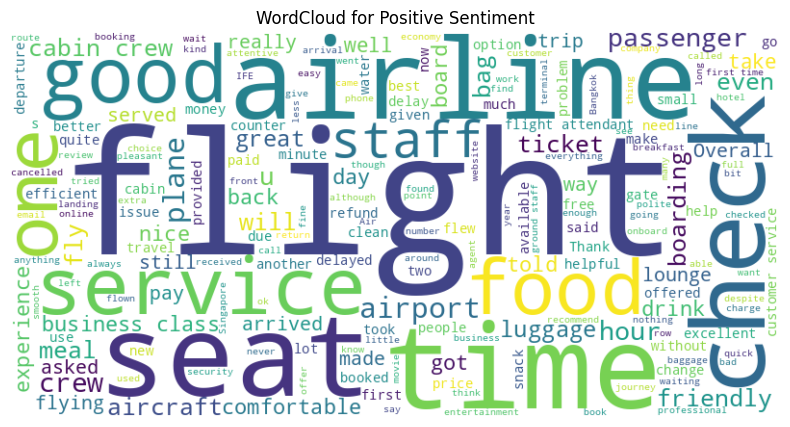

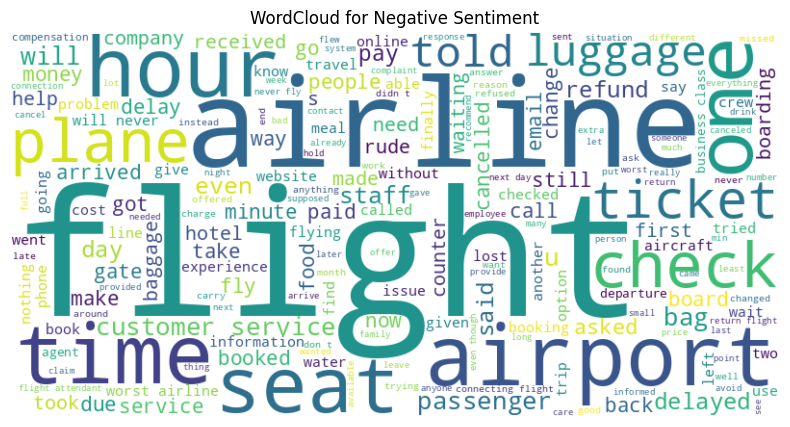

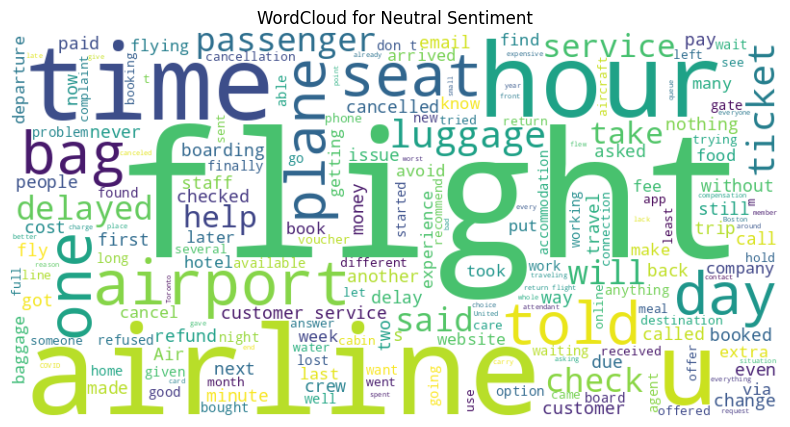

In [ ]:
from wordcloud import WordCloud

# Assuming you have a DataFrame with 'text' and 'sentiment' columns
for sentiment in data['Ensemble_Sentiment'].unique():
    text = " ".join(data[data['Ensemble_Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud for {sentiment} Sentiment")
    plt.axis('off')
    plt.show()

In [ ]:
sen_counts = data['Ensemble_Sentiment'].value_counts()
print(sen_counts)

Ensemble_Sentiment
Negative    6995
Positive    5167
Neutral      157
Name: count, dtype: int64


In [ ]:
# Group the DataFrame by 'Overall_Rating' and 'Recommended', then count the occurrences
rating_recommended_counts = data.groupby(['Recommended', 'Ensemble_Sentiment'])['Ensemble_Sentiment'].count()

# Display the result
print(rating_recommended_counts)

Recommended  Ensemble_Sentiment
no           Negative              6743
             Neutral                146
             Positive              1680
yes          Negative               252
             Neutral                 11
             Positive              3487
Name: Ensemble_Sentiment, dtype: int64


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords (common words like "the," "is," "and" that may not be useful for sentiment analysis)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join the filtered tokens back into a single string
    processed_text = ' '.join(filtered_tokens)

    return processed_text

# Apply preprocessing to the 'Review' column
data['Processed_Review'] = data['Review'].apply(preprocess_text)

# Split the dataset into training and testing sets
X = data['Processed_Review']
y = data['Ensemble_Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create and train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_tfidf)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision, recall, and F1-score for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.86
Precision: 0.85
Recall: 0.86
F1 Score: 0.85
              precision    recall  f1-score   support

    Negative       0.84      0.92      0.88      1372
     Neutral       0.00      0.00      0.00        25
    Positive       0.89      0.79      0.84      1067

    accuracy                           0.86      2464
   macro avg       0.58      0.57      0.57      2464
weighted avg       0.85      0.86      0.85      2464



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

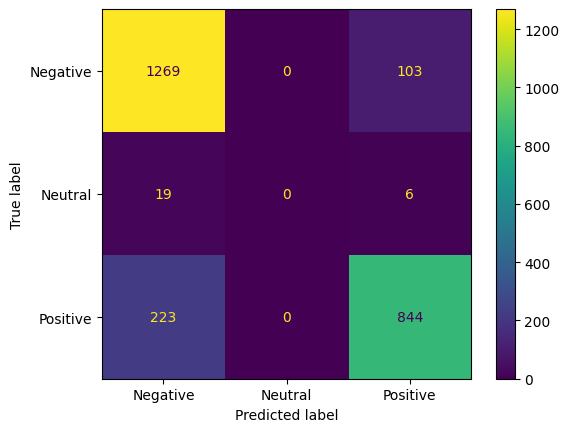

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test_tfidf, y_test)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_dt = dt_classifier.predict(X_test_tfidf)

# Calculate and print evaluation metrics for Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Classifier Metrics:")
print(f'Accuracy: {accuracy_dt:.2f}')
print(f'Precision: {precision_dt:.2f}')
print(f'Recall: {recall_dt:.2f}')
print(f'F1 Score: {f1_dt:.2f}')

print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Metrics:
Accuracy: 0.74
Precision: 0.75
Recall: 0.74
F1 Score: 0.75
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.77      1372
     Neutral       0.00      0.00      0.00        25
    Positive       0.71      0.74      0.73      1067

    accuracy                           0.74      2464
   macro avg       0.50      0.50      0.50      2464
weighted avg       0.75      0.74      0.75      2464



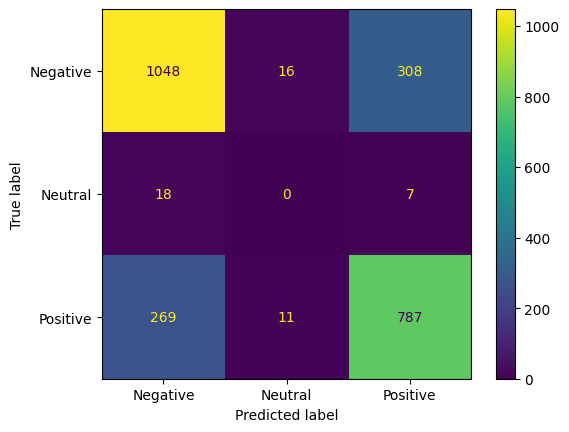

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test_tfidf, y_test)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Calculate and print evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f'Accuracy: {accuracy_rf:.2f}')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1 Score: {f1_rf:.2f}')

print(classification_report(y_test, y_pred_rf))

Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
              precision    recall  f1-score   support

    Negative       0.82      0.91      0.86      1372
     Neutral       0.00      0.00      0.00        25
    Positive       0.86      0.75      0.81      1067

    accuracy                           0.83      2464
   macro avg       0.56      0.56      0.56      2464
weighted avg       0.83      0.83      0.83      2464



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

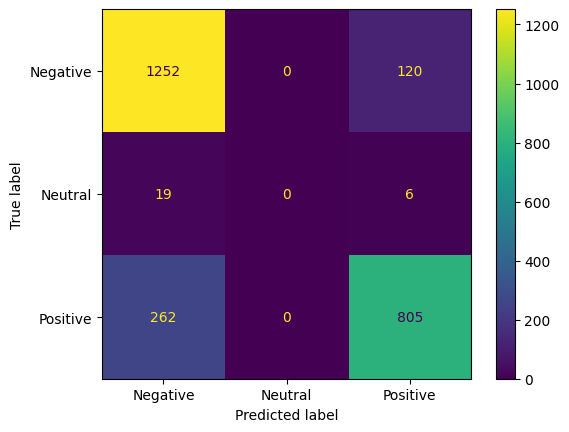

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test_tfidf, y_test)
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Create an SVM classifier (you can specify the kernel, C parameter, etc.)
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42,probability=True)

# Train the classifier on the training data
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Calculate and print evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f'Accuracy: {accuracy_svm:.2f}')
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'F1 Score: {f1_svm:.2f}')

print(classification_report(y_test, y_pred_svm))

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.84
              precision    recall  f1-score   support

    Negative       0.82      0.94      0.88      1372
     Neutral       0.00      0.00      0.00        25
    Positive       0.90      0.76      0.82      1067

    accuracy                           0.85      2464
   macro avg       0.57      0.57      0.57      2464
weighted avg       0.85      0.85      0.84      2464



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

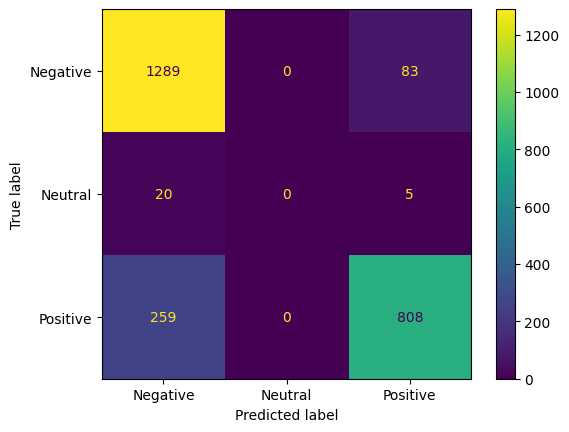

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test_tfidf, y_test)
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Create individual classifiers
logistic_regression_classifier = LogisticRegression(random_state=42)
svc_classifier = SVC(kernel='rbf', random_state=42,probability=True)
decision_tree_classfier = DecisionTreeClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)

# Create a Voting Classifier that combines the four classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('logistic_regression', logistic_regression_classifier),
    ('svc', svc_classifier),
    ('decision_tree', decision_tree_classfier),
    ('random_forest', random_forest_classifier)
], voting='soft')

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_ensemble = ensemble_classifier.predict(X_test_tfidf)

# Calculate and print evaluation metrics for the ensemble classifier
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')

print("Ensemble Classifier Metrics:")
print(f'Accuracy: {accuracy_ensemble:.2f}')
print(f'Precision: {precision_ensemble:.2f}')
print(f'Recall: {recall_ensemble:.2f}')
print(f'F1 Score: {f1_ensemble:.2f}')

print(classification_report(y_test, y_pred_ensemble))

Ensemble Classifier Metrics:
Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1 Score: 0.84
              precision    recall  f1-score   support

    Negative       0.84      0.90      0.87      1372
     Neutral       0.00      0.00      0.00        25
    Positive       0.86      0.79      0.83      1067

    accuracy                           0.85      2464
   macro avg       0.57      0.57      0.56      2464
weighted avg       0.84      0.85      0.84      2464



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

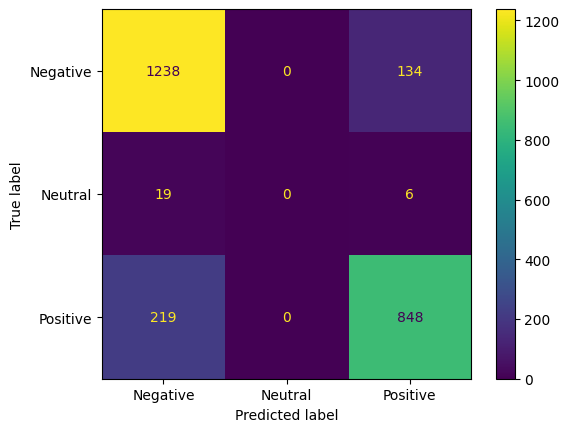

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(ensemble_classifier, X_test_tfidf, y_test)
plt.show()

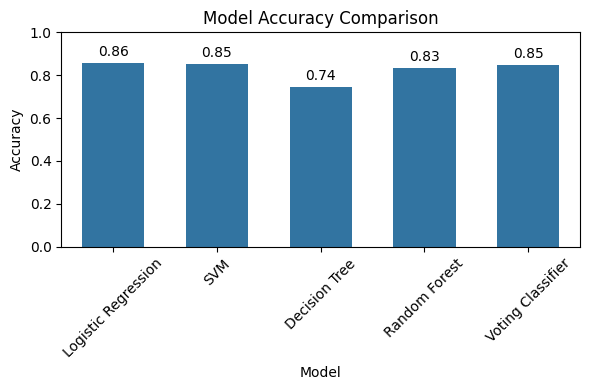

In [ ]:
# To visualize the metrics of all the models
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Voting Classifier']
accuracy_scores = [accuracy, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_ensemble]

results_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=results_df, x='Model', y='Accuracy',width=0.6)
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")

# Add accuracy values to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
unseen_reviews = [
    "The flight was comfortable and the staff were extremely helpful.",
    "Terrible experience. The food was awful and the flight was delayed for hours.",
    "The crew was friendly but the seats were very uncomfortable.",
    "I loved the service and smooth takeoff. Would fly again!"
]

In [ ]:
unseen_reviews_tfidf = tfidf_vectorizer.transform(unseen_reviews)

# Predict using your best model, e.g., ensemble
unseen_preds = ensemble_classifier.predict(unseen_reviews_tfidf)

# Output predictions
for review, pred in zip(unseen_reviews, unseen_preds):
    print(f"Review: \"{review}\"\nPredicted Sentiment: {pred}\n")

Review: "The flight was comfortable and the staff were extremely helpful."
Predicted Sentiment: Positive

Review: "Terrible experience. The food was awful and the flight was delayed for hours."
Predicted Sentiment: Negative

Review: "The crew was friendly but the seats were very uncomfortable."
Predicted Sentiment: Positive

Review: "I loved the service and smooth takeoff. Would fly again!"
Predicted Sentiment: Positive

